In [1]:
import networkx as nx
import DynaNet
from Equations import FisherKPPStep as KPP
import numpy as np
from matplotlib import pyplot as plt

# Set exponent of graph size
N = 8

# Note here that 0 is our Root node and will follow special dynamics
G = nx.full_rary_tree(3, 3**N-1)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 3.2
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

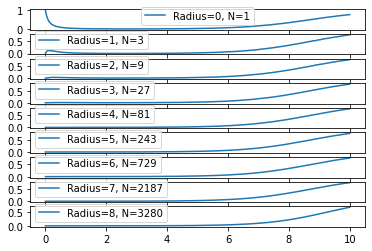

In [2]:
# compute shortest path lengths from our tension source node
spl = nx.shortest_path_length(G, source=0)
spl = np.array([spl[k] for k in range(3**N-1)])

# set up for plotting
fig, axs = plt.subplots(len(set(spl)), 1)

# Iterate through unique radii
for ii in set(spl):
    # mask on radii and sum for total load at radius ii
    loads = np.dot(np.transpose(res.y), spl==ii)/sum(spl==ii)
    axs[ii].plot(res.t, loads, label=f'Radius={ii}, N={sum(spl==ii)}')

    # Plot legends
    axs[ii].legend()

{0, 1, 2, 3, 4, 5, 6, 7, 8}
0
1
4
13
40
121
364
1093
3280


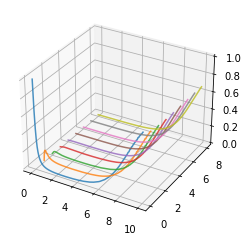

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_ticks = list(range(3**N-1))
print(set(spl))
for ii in set(spl):
    jj = np.argwhere(spl==ii)[0][0]
    print(jj)
    ax.plot(res.t, res.y[jj, :], zs=ii, zdir='y', alpha=0.8)

0
1
4
13
40
121
364
1093
3280


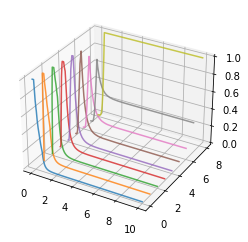

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_ticks = list(range(3**N-1))
u = []

# get w_maxes
for ii in set(spl):
    u.append(np.argwhere(spl==ii)[0][0])

res1 = res.y[u, :]
weights = 3**(np.arange(9))
res1 = res1*weights[:, np.newaxis]
res1 = res1/res1.max(axis=0)
    
for ii in set(spl):
    jj = np.argwhere(spl==ii)[0][0]
    print(jj)
    ax.plot(res.t, res1[ii, :], zs=ii, zdir='y', alpha=0.8)

In [9]:
1/(1+np.exp(789))

C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


0.0